# Linear Regression

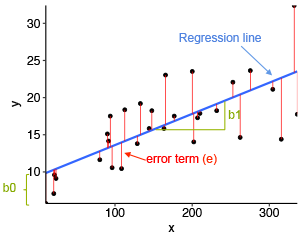

- Supervised Learning Algorithm


- Approximating Datapoints with a linear function; with this we will be able to predict new value classifications




**Approximation with the linear function:**

$\hat{y} = wx + b$ (1.1)


- to get the optimal w and b we use a cost function




**Cost function** (mean squared error)

$MSE = J(w,b) = \frac{1}{N} \sum_{n=1}^{n}(y_i-(wx_i + b))^2 $ (1.2)

--> this is calculating the squared difference between the actual y-values and the approximated y-values of all trainingpoints, summing them up and divide the sum by the amount of trainingpoints --> result is the mean squared error

N, n are the amount of datapoints 

$y_i$ is the actual y value of a single trainingpoint

$ wx_i +b$ is the approximated value



- we want to minimize the minimum of the cost function; for this we need the gradient of the cost function

**Gradient of the Cost function**


${J' = \left[ \begin{array}{rr}
\frac{df}{dw}\\\ 
\frac{df}{db}\\
\end{array}\right]}$ 

${J' = \left[ \begin{array}{rr}
\frac{1}{N} \sum_{i=1}^{n}-2x_i(y_i-(wx_i+b)) = \frac{1}{N}\sum_{i=1}^{n}2x_i(\hat{y}-y_i)\\\ 
 \frac{1}{N} \sum_{i=1}^{n}-x_i(y_i-(wx_i+b))=\frac{1}{N} \sum_{i=1}^{n}2(\hat{y}-y_i)\\
\end{array}\right]}$ (1.3) & (1.4)


**Gradient Descent to find iterative the minimum of the Cost Function**

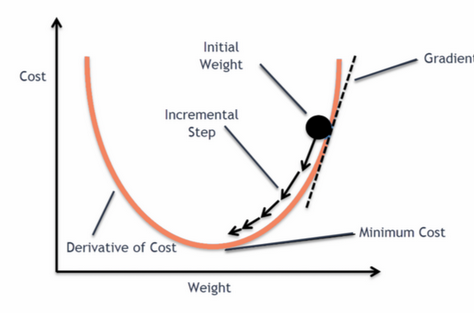

- we are descending the function in the direction of the steepest descent with each iteration we have an update rule to get new weights and a new bias

**Update Rule**

$w = w - \alpha * dw$ (1.5)

$b = b - \alpha * db$ (1.6)

$\alpha$ is the learning rate; defines how far we descent the cost function at each iteration



**Additional information for $\hat{y}$ and dw**




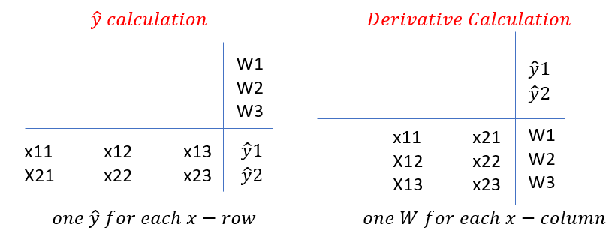

In [42]:
import numpy as np


class LinearRegression:
    def __init__(self, learning_rate = 0.01, n_iterations = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
      
    # function that contains the training step & the gradient descent
    def fit(self, X, y):       
        
        # X is a n-d-array, with n = number of samples and d = number of features in each sample
        self.n_samples, self.n_features = X.shape
        
        # initialize weights and bias
        # for each feature column we will have 1 weight, but we will only have 1 scalar bias        
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
        # we want to apply both update rules (1.5), (1.6) iteratively; for this, we need to
        # 1) calculate one y_hat for each row of x-features
        # 2) calculate one dw for each column of x-features
        # 3) calculate one db
        # 4) apply update rule according to (1.5) and (1.6)
        for _ in range(self.n_iterations):
            
            # 1)  calculate one y_hat for each x-feature-vector row; see additional
            # information in the picture above for more
            y_hat = np.dot(X, self.weights) + self.bias
            
            # 2) for each x-column we want to have one dw; see additional information in the image above
            dw = (1 / self.n_samples) * np.dot(X.T, (y_hat - y))
            
            # 3)
            db = (1 / self.n_samples) * np.sum(y_hat - y)
            
            #4)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            
    
    
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        return y_hat
    
    # helperfunction that calculates the mean squared error in order to calculate the model's accuracy
    def calculate_evaluation_error(self, y_hat, y_test):
        return np.mean(y_test - y_hat)**2
    

# Test the model

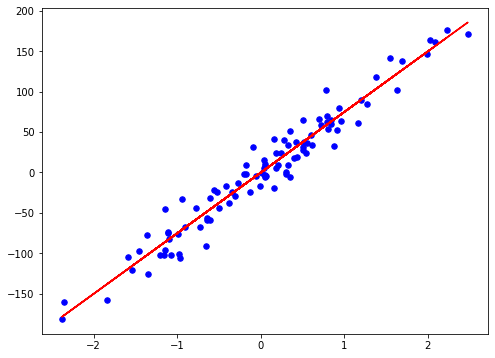

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


# generate 2D example data  
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)


linear_regression_classifier = LinearRegression()
linear_regression_classifier.fit(X_train, y_train)

predictions = linear_regression_classifier.predict(X_test)

mse = linear_regression_classifier.calculate_evaluation_error(predictions, y_test)




# little graphical demonstration of what we did
y_hat_line = linear_regression_classifier.predict(X)
plt.plot(X, y_hat_line, c = 'red')